In [226]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [227]:
data = pd.read_csv('/Users/ghazalrezaei/Downloads/homeworks/ALA/TrainData.txt', header= None)
print(data.shape)
data.head()

(20000, 1200)


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
def plot(array):    
    fig = plt.figure(figsize=(16, 12))
    for i in range(array.shape[0]):
        tmp_img = array[i].reshape((40,30))
        fig.add_subplot(1,array.shape[0],i+1)
        plt.imshow(tmp_img, cmap='Greys')
    plt.show()

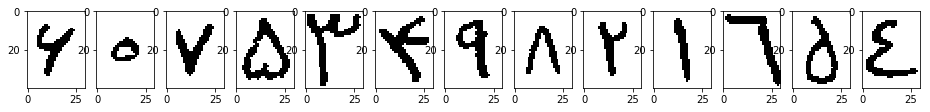

In [229]:
img = data.values
chosen = [img[0],img[5],img[9],img[14],img[17],img[22],img[30],img[31],img[33],img[233],img[13],img[15],img[35]]
plot(np.array(chosen))

In [230]:
def Dist(a,b):
    return np.linalg.norm(a-b)

In [231]:
def Avg(cluster):
    return np.mean(cluster, axis=0)

In [232]:
def InitialCentroids_RandomGenerate(vectors,k):
    return np.random.rand(k,vectors.shape[1])

In [233]:
def InitialCentroids_RandomSelect(vectors,k):
    return vectors[np.random.choice(vectors.shape[0], k, replace=False), :]

In [234]:
def InitialCentroids_Partition(vectors,k):
    c = []
    for i in range(k):
#        print(vectors.shape[0]//k*i,vectors.shape[0]//k*(i+1))
        c.append(Avg(np.array(vectors[vectors.shape[0]//k*i:vectors.shape[0]//k*(i+1),:])))
    return np.array(c)

In [235]:
def AssignToCluster(vector,centroids):
    cluster_num = 0;
    min_dist = Dist(vector,centroids[0])
    for i in range(1,len(centroids)):
        temp_dist = Dist(vector,centroids[i])
        if temp_dist < min_dist:
            cluster_num = i
            min_dist = temp_dist
    return cluster_num

In [236]:
def Kmeans(ClustersNo):
#     centroids = InitialCentroids_RandomGenerate(img,ClustersNo)
    centroids = InitialCentroids_RandomSelect(img,ClustersNo)
#     centroids = InitialCentroids_Partition(img,ClustersNo)
#     centroids = np.array(chosen[:ClustersNo])
    plot(centroids)
    while(True):
        clusters = [[] for i in range(centroids.shape[0])]
        for vector in img:
            cluster_num = AssignToCluster(vector,centroids)
            clusters[cluster_num].append(vector)
        new_centroids = []
        for j in range(centroids.shape[0]):
            if clusters[j]:
                new_centroids.append(Avg(np.array(clusters[j])))
            else:
                new_centroids.append(np.zeros(img.shape[1], dtype=float))
        new_centroids = np.array(new_centroids)
        cost = Dist(new_centroids,centroids)/ClustersNo
        if cost < 0.08:
            return new_centroids,clusters,cost
        centroids = new_centroids

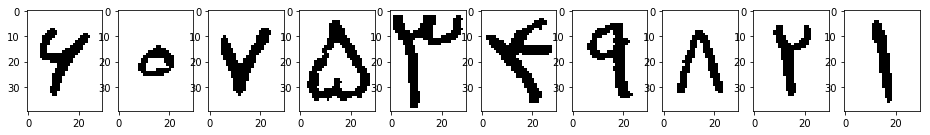

cost = 0.07629936628082613


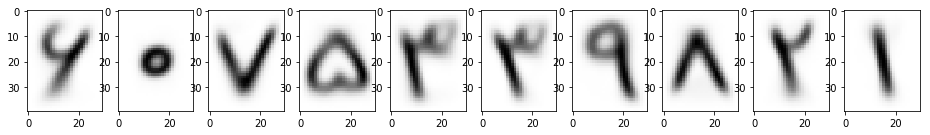

In [237]:
centroids,clusters,cost = Kmeans(10)
print('cost =',cost)
plot(centroids)

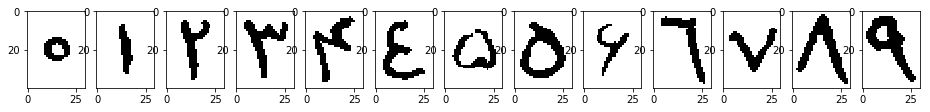

compare:


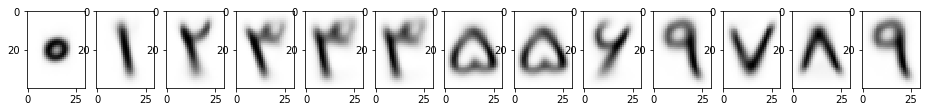

In [238]:
test_data = pd.read_csv('/Users/ghazalrezaei/Downloads/homeworks/ALA/TestData.txt', header= None)
tst = test_data.values
cluster_centers = []
for vector in tst:
    cluster_centers.append(centroids[AssignToCluster(vector,centroids)])
plot(tst)
print('compare:')
plot(np.array(cluster_centers))